<h1>Аналіз та обробка БМД</h1>
<h2>БС-82</h2>
<h3 style="font-family:sans-serif;">Микита Любшин<h3>
  <link rel ="stylesheet" href="style.css"></link>

<h3>Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.
</h3>

In [125]:
import seaborn as sns
import numpy as np
import matplotlib.backends.backend_pdf as pdf
import matplotlib.pyplot as plt
import pandas as pd

myData = {};
myData["N_Distribution_1"]=(np.random.normal(size=20))  
myData["N_Distribution_2"]=(np.random.normal(size=20))  
myData["N_Distribution_3"]=(np.random.normal(size=20))  
myData["Uniform Distribution1"]=(np.random.uniform(low=1,high=2,size=20))
myData["Exponential distribution."]=(np.random.exponential(5,size=20))
myData["Uniform Distribution2"]=(np.random.uniform(size=20))

for i, k in myData.items():
    print(f" { i } - {k} \n")

 N_Distribution_1 - [-0.43103721  1.75227184  1.00465169 -1.51799097  0.61454678  0.03967822
 -0.88956023  1.73017148  1.0792577   3.26591527 -0.89370521  1.14626684
  1.29247492  0.39206227 -0.65735647 -0.91460564 -0.10398868  0.97609368
 -0.31685955  0.10817961] 

 N_Distribution_2 - [ 0.48248877 -1.5781592  -0.28954169  0.21954175 -0.86666493  0.93845955
  1.63529197  0.52343805  0.85748537 -0.52149605  0.4555362   0.76310918
 -0.79246393 -0.52370613 -0.05794552 -0.15838213 -1.23410338 -0.7988498
  1.41472324 -0.07976136] 

 N_Distribution_3 - [-2.0023598  -0.1045554  -0.62356816 -1.22636828 -1.19103255 -1.47350998
 -2.03012053 -1.88628246  0.53152575 -0.57206958 -0.75468915  1.30539628
 -0.80227711 -0.79526218  0.95546103 -1.05582507  0.31047703  0.02553247
  0.03499911 -1.5081401 ] 

 Uniform Distribution1 - [1.39449084 1.65217214 1.1982936  1.37504232 1.97548379 1.01785681
 1.75182581 1.21335345 1.42467019 1.93666783 1.0275656  1.49841376
 1.65467637 1.74449905 1.10074054 1.12071

Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку: https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf


In [70]:
def ShapiroWilk(data, num_of_var ,num_of_observations=20):  
    map( lambda x: x.sort() , data.values()) # Value sorting
    s = [sum([ (i - np.mean(val)) **2 for i in val]) for val in data.values()]
    ex1=pd.read_excel('Coeficients for the W test for normality.xlsx')[num_of_observations-1]/10000   
    b = [ np.multiply(ex1[:10], (np.flip(value[len(value)//2:])-value[:len(value)//2])) for value in data.values() ]
    array_s = [ (i**2)/s[i] for i in range(len(b))]
    
    print("\n".join(map( lambda i:f"Disribution is {'not normal' if i>0.905 else 'normal'}" , array_s)))
        
ShapiroWilk(myData,6,20)

Disribution is normal
Disribution is normal
Disribution is normal
Disribution is not normal
Disribution is normal
Disribution is not normal


<h4>Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. Шаблон таблиці: https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing</h4>

In [71]:
table=pd.DataFrame(columns=["Variable","Statistics","Distribution"]) 
table

,Variable,Statistics,Distribution


<h4>Занести в стовпчик Variable назви змінних.</h4>

In [73]:
table['Variable']=myData.keys()
table

,Variable,Statistics,Distribution
0,N_Distribution_1,NaN,NaN
1,N_Distribution_2,NaN,NaN
2,N_Distribution_3,NaN,NaN
3,Uniform Distribution1,NaN,NaN
4,Exponential distribution.,NaN,NaN
5,Uniform Distribution2,NaN,NaN


<h4>Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".</h4>

In [77]:
table["Distribution"]=['normal' if 'N_Distribution' in i else 'non-normal'
                          for i in table["Variable"]]
table

,Variable,Statistics,Distribution
0,N_Distribution_1,NaN,normal
1,N_Distribution_2,NaN,normal
2,N_Distribution_3,NaN,normal
3,Uniform Distribution1,NaN,non-normal
4,Exponential distribution.,NaN,non-normal
5,Uniform Distribution2,NaN,non-normal


<h4></h4>

<h4>Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].</h4>

In [120]:
n_df=pd.DataFrame((myData), columns=myData.keys())

for _,val in table.iterrows:
    val["Statistics"] = "{:.3f} [{:.3f}]".format(
        n_df[val["Variable"]].mean(),n_df[val["Variable"]].std()) if val["Distribution"] != "non-normal" else "{:.3f} [{:.3f}; {:.3f}]".format(
        n_df[val["Variable"]].median(),n_df[name].quantile(0.25),n_df[val["Variable"]].quantile(0.75))

        
table

,Variable,Statistics,Distribution
0,N_Distribution_1,0.472 [0.873],normal
1,N_Distribution_2,-0.174 [1.371],normal
2,N_Distribution_3,-0.107 [1.194],normal
3,Uniform Distribution1,1.610 [0.261],non-normal
4,Exponential distribution.,5.206 [7.124],non-normal
5,Uniform Distribution2,0.577 [0.311],non-normal


<h4>Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].
Зберегти таблицю в пдф форматі</h4>

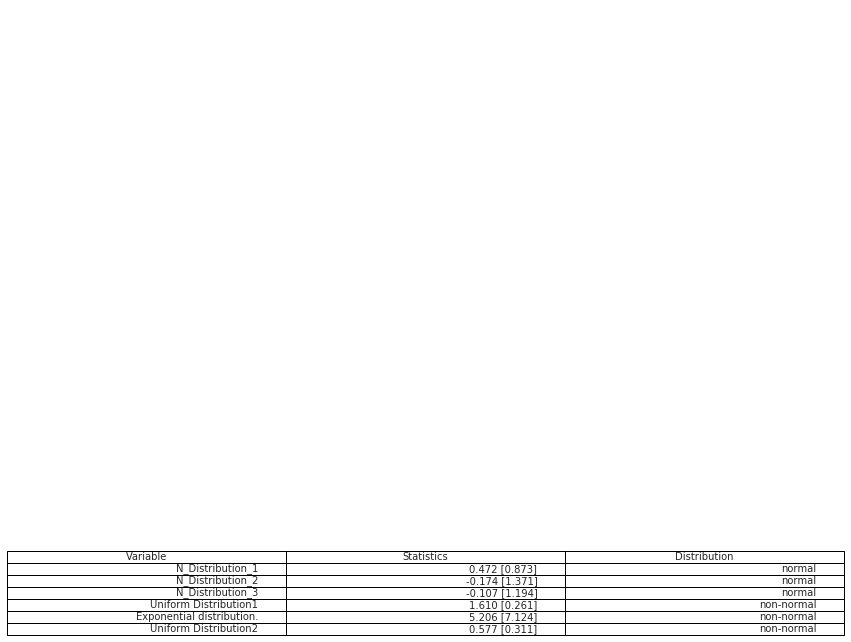

In [133]:
f,ax=plt.subplots(figsize=(15,10))
ax.axis('off')
table_to_save=ax.table(cellText=table.values, colLabels=table.columns)

to_save=pdf.PdfPages("table.pdf") 
to_save.savefig(f) 
to_save.close()